# Heart Attack Prediction Using Ensemble Learning Models

#### Importing Libraries

In [6]:
# Data handling and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, roc_curve, ConfusionMatrixDisplay,
    mean_absolute_error, mean_squared_error, r2_score
)

# To save models
import joblib

#### Load dataset

In [9]:
data = pd.read_csv('/Users/ravindranathchowdary/Chowdary/applied data/Heart_Failure_Details.csv')
data.head()

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


#### Exploratory Data Analysis (EDA)

In [12]:
# Check for missing values
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine phosphokinase    0
diabetes                    0
ejection fraction           0
high bp                     0
platelets                   0
serum creatinine            0
serum sodium                0
sex                         0
smoking                     0
death                       0
dtype: int64


In [14]:
# Summary statistics
print(data.describe())

              age     anaemia  creatinine phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection fraction     high bp      platelets  serum creatinine  \
count         299.000000  299.000000     299.000000         299.00000   
mean           38.083612    0.351171  263358.029264           1.39388   
std            11.834841    0.478136   97804.236869           1.03451   
min            14.000000    0.000000   25100.000000           0.5000

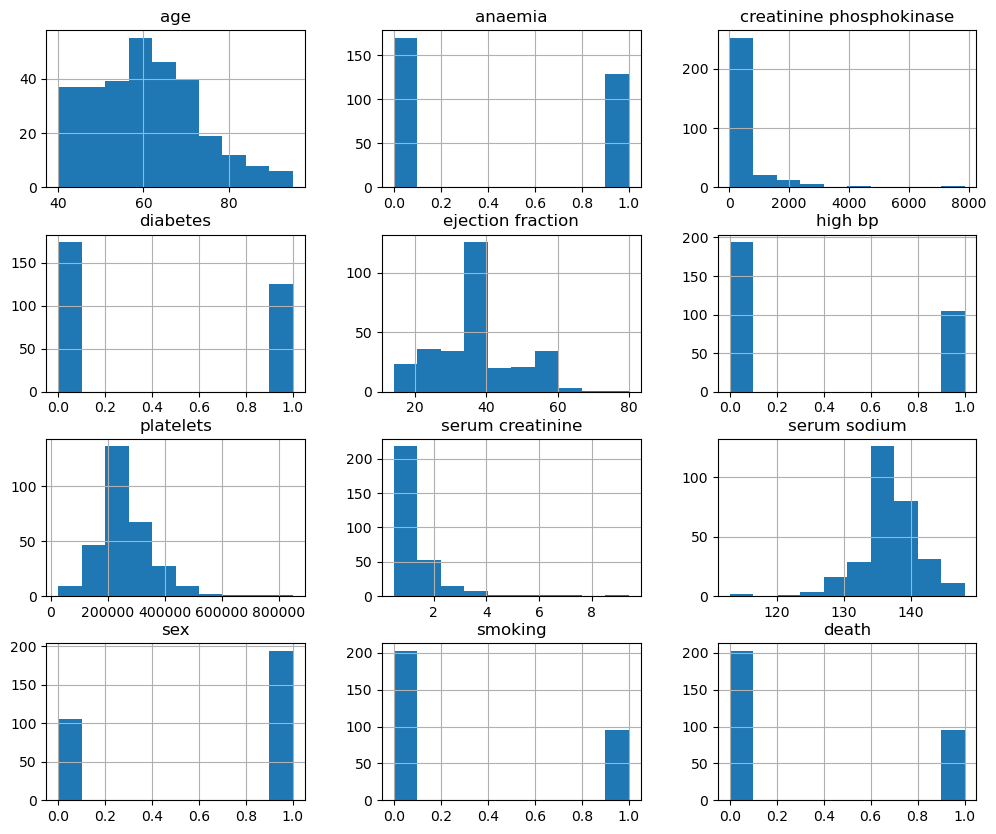

In [16]:
# Plot histograms for numerical variables
data.hist(figsize=(12, 10))
plt.show()

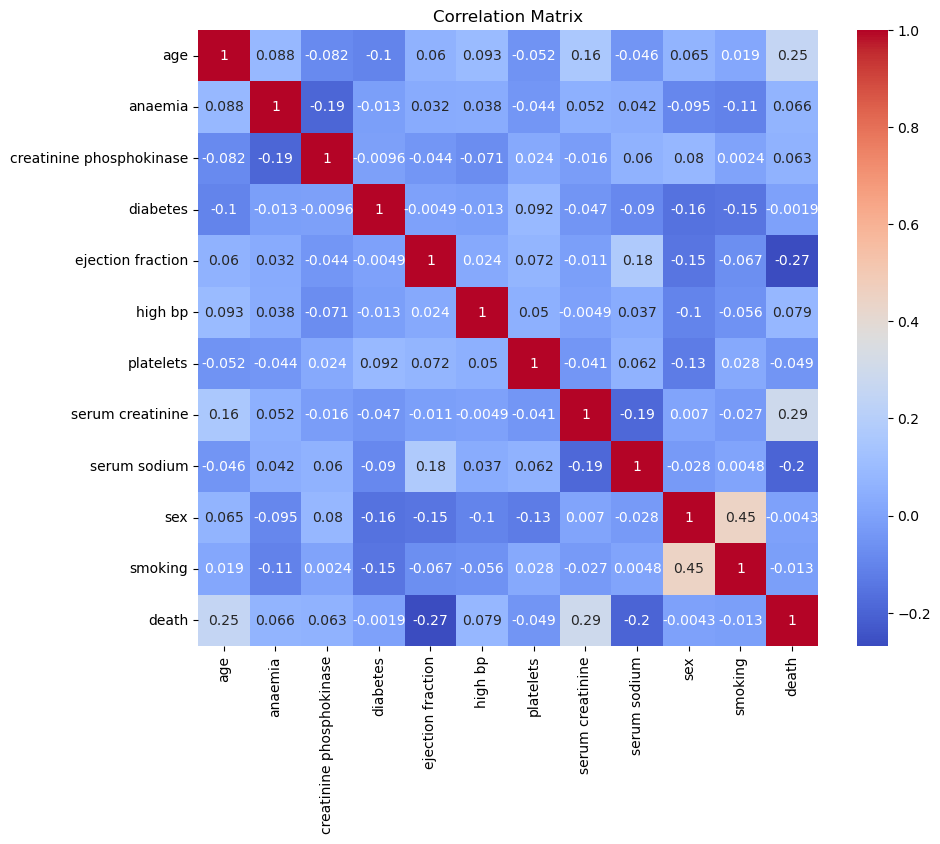

In [18]:
# Plot a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Data Cleaning

In [21]:
# Removing outliers from 'creatinine phosphokinase'
Q1 = data['creatinine phosphokinase'].quantile(0.25)
Q3 = data['creatinine phosphokinase'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['creatinine phosphokinase'] >= (Q1 - 1.5 * IQR)) & 
            (data['creatinine phosphokinase'] <= (Q3 + 1.5 * IQR))]

#### Split Dataset

In [24]:
# Split the dataset into features (X) and target (y)
X = data.drop("death", axis=1)
y = data["death"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Normalization

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Model Selection and Training

In [89]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train each model and store them
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model
    print(f"{model_name} trained successfully.")


Logistic Regression trained successfully.
Random Forest trained successfully.
Support Vector Machine trained successfully.
Gradient Boosting trained successfully.


#### Evaluate Models

In [43]:
# Function to evaluate each model
def evaluate_model(model, model_name):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    
    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if auc is not None:
        print(f"AUC-ROC: {auc:.4f}")
    
    return accuracy, precision, recall, f1, auc

# Dictionary to store model performance metrics
performance_metrics = {}

# Evaluate each model
for model_name, model in trained_models.items():
    metrics = evaluate_model(model, model_name)
    performance_metrics[model_name] = metrics


Logistic Regression Performance:
Accuracy: 0.7222
Precision: 0.5714
Recall: 0.6667
F1 Score: 0.6154
AUC-ROC: 0.7593

Random Forest Performance:
Accuracy: 0.7593
Precision: 0.6316
Recall: 0.6667
F1 Score: 0.6486
AUC-ROC: 0.7801

Support Vector Machine Performance:
Accuracy: 0.7778
Precision: 0.6667
Recall: 0.6667
F1 Score: 0.6667
AUC-ROC: 0.7994

Gradient Boosting Performance:
Accuracy: 0.7778
Precision: 0.6500
Recall: 0.7222
F1 Score: 0.6842
AUC-ROC: 0.7948


#### Model Tuning and Optimization (Hyperparameter Tuning with GridSearchCV)

In [49]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],              # Regularization parameter
    'solver': ['lbfgs', 'liblinear', 'saga'],    # Solvers for optimization
    'max_iter': [100, 200, 500]                  # Number of iterations
}

param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30, 40],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],             # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4]                # Minimum samples at each leaf node
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],                      # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],         # Kernel type
    'gamma': ['scale', 'auto'],                  # Kernel coefficient
}

param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],         # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2, 0.5],      # Learning rate
    'max_depth': [3, 5, 7],                      # Maximum depth of each estimator
    'min_samples_split': [2, 5, 10]              # Minimum samples needed to split a node
}

# Models and grids for GridSearchCV
models_param_grid = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Support Vector Machine': (SVC(probability=True), param_grid_svm),
    'Gradient Boosting': (GradientBoostingClassifier(), param_grid_gb)
}

# Dictionary to store tuned models
tuned_models = {}

# Perform Grid Search for each model
for model_name, (model, param_grid) in models_param_grid.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grid, 
        cv=5,                # 5-fold cross-validation
        scoring='accuracy',  # Use accuracy as the scoring metric (change as needed)
        n_jobs=-1            # Use all available cores
    )
    grid_search.fit(X_train, y_train)
    
    # Save the best estimator for each model
    tuned_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy for {model_name}: {grid_search.best_score_:.4f}\n")

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}
Best cross-validated accuracy for Logistic Regression: 0.7408

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validated accuracy for Random Forest: 0.7914

Tuning Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated accuracy for Support Vector Machine: 0.7592

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy for Gradient Boosting: 0.7636



In [52]:
# Function to calculate extended metrics
def evaluate_model_extended(model, model_name):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, AUC-ROC: {auc:.4f}")
    
    return accuracy, r2, mae, mse, auc

# Store extended metrics
extended_metrics = {}

# Evaluate tuned models
for model_name, model in tuned_models.items():
    metrics = evaluate_model_extended(model, model_name)
    extended_metrics[model_name] = metrics


Logistic Regression Performance:
Accuracy: 0.7407, R-squared: -0.1667, MAE: 0.2593, MSE: 0.2593, AUC-ROC: 0.7623

Random Forest Performance:
Accuracy: 0.7407, R-squared: -0.1667, MAE: 0.2593, MSE: 0.2593, AUC-ROC: 0.8164

Support Vector Machine Performance:
Accuracy: 0.7407, R-squared: -0.1667, MAE: 0.2593, MSE: 0.2593, AUC-ROC: 0.7546

Gradient Boosting Performance:
Accuracy: 0.7963, R-squared: 0.0833, MAE: 0.2037, MSE: 0.2037, AUC-ROC: 0.8164


#### Visualizing Model Performance

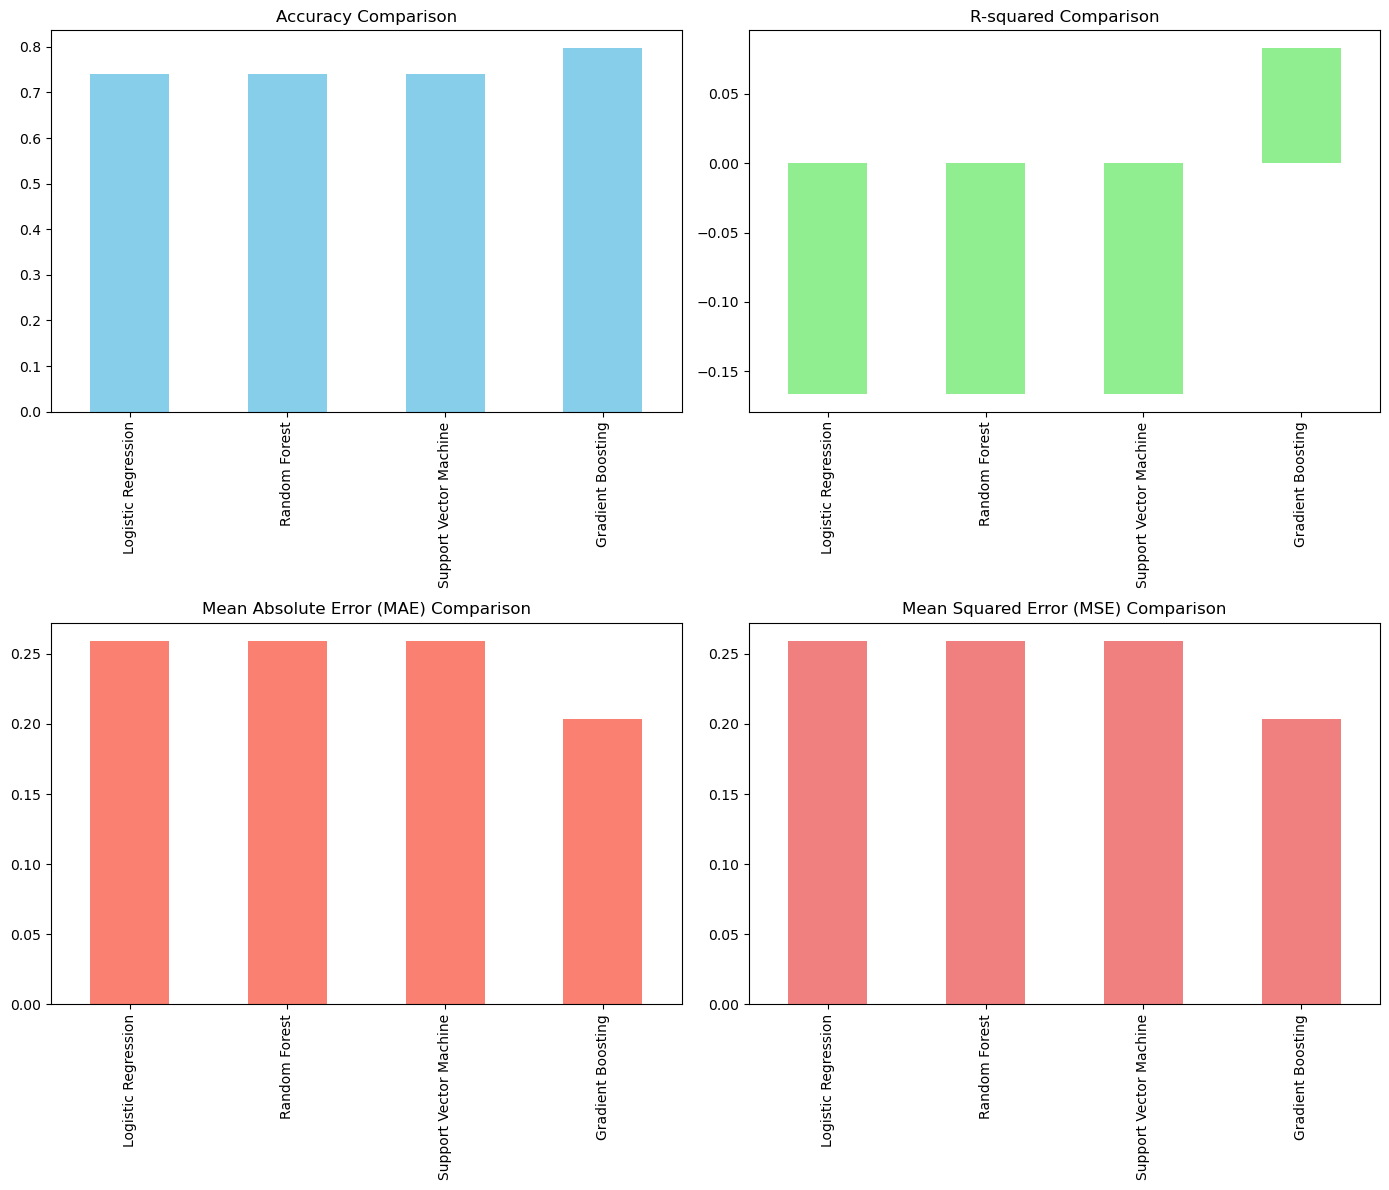

In [60]:
# Convert to DataFrame
metrics_df = pd.DataFrame(extended_metrics, index=['Accuracy', 'R-squared', 'MAE', 'MSE', 'AUC-ROC']).T

# Plot Accuracy, R-squared, MAE, MSE
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot each metric
metrics_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
metrics_df['R-squared'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
metrics_df['MAE'].plot(kind='bar', ax=axes[1, 0], color='salmon')
metrics_df['MSE'].plot(kind='bar', ax=axes[1, 1], color='lightcoral')

# Set titles
axes[0, 0].set_title("Accuracy Comparison")
axes[0, 1].set_title("R-squared Comparison")
axes[1, 0].set_title("Mean Absolute Error (MAE) Comparison")
axes[1, 1].set_title("Mean Squared Error (MSE) Comparison")

plt.tight_layout()
plt.show()

#### Model Comparison and Selection

In [72]:
# Dictionary to store model performance metrics
performance_metrics = {}

# Evaluate each tuned model
for model_name, model in tuned_models.items():
    metrics = evaluate_model(model, model_name)
    performance_metrics[model_name] = metrics


Logistic Regression Performance:
Accuracy: 0.7407
Precision: 0.5909
Recall: 0.7222
F1 Score: 0.6500
AUC-ROC: 0.7623

Random Forest Performance:
Accuracy: 0.7407
Precision: 0.6111
Recall: 0.6111
F1 Score: 0.6111
AUC-ROC: 0.8164

Support Vector Machine Performance:
Accuracy: 0.7407
Precision: 0.5909
Recall: 0.7222
F1 Score: 0.6500
AUC-ROC: 0.7546

Gradient Boosting Performance:
Accuracy: 0.7963
Precision: 0.7059
Recall: 0.6667
F1 Score: 0.6857
AUC-ROC: 0.8164


In [74]:
# Convert performance metrics dictionary to DataFrame
metrics_df = pd.DataFrame(performance_metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']).T
print("\nModel Performance Comparison:\n", metrics_df)


Model Performance Comparison:
                         Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression     0.740741   0.590909  0.722222  0.650000  0.762346
Random Forest           0.740741   0.611111  0.611111  0.611111  0.816358
Support Vector Machine  0.740741   0.590909  0.722222  0.650000  0.754630
Gradient Boosting       0.796296   0.705882  0.666667  0.685714  0.816358


In [76]:
# Select the best model based on highest AUC-ROC or F1 Score
best_model_name = metrics_df['AUC-ROC'].idxmax()
best_model = tuned_models[best_model_name]
print(f"\nSelected Best Model: {best_model_name}")


Selected Best Model: Random Forest


#### Final Model Evaluation and Visualization

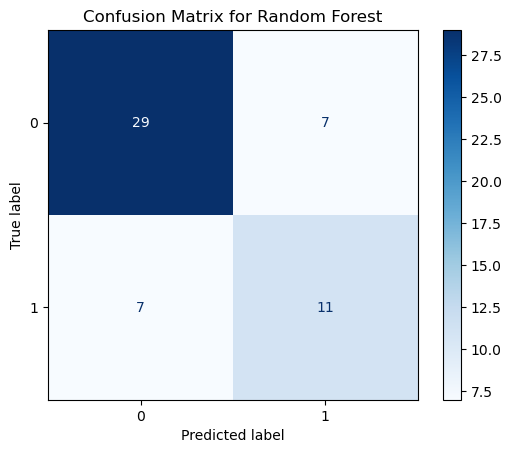

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for the best model
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()

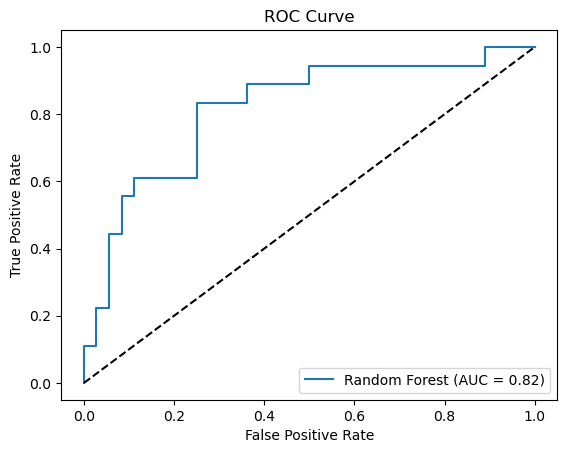

In [81]:
# ROC Curve for the best model
if hasattr(best_model, "predict_proba"):
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

#### Save the Best Model for Deployment (for future development)

In [84]:
# Save the best model
joblib.dump(best_model, f"{best_model_name}_model.pkl")
print(f"{best_model_name} model saved successfully!")

Random Forest model saved successfully!
